## Handle Categorical missing values

# 1. Frequent Category Imputation

In [6]:
dt.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
dt=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
dt.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
dt.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
dt.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [11]:
dt.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the frequency with every feature

<Axes: xlabel='BsmtQual'>

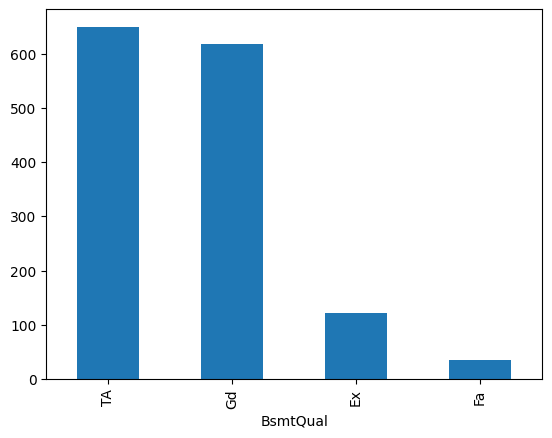

In [16]:
dt['BsmtQual'].value_counts().plot.bar()

In [12]:
dt.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

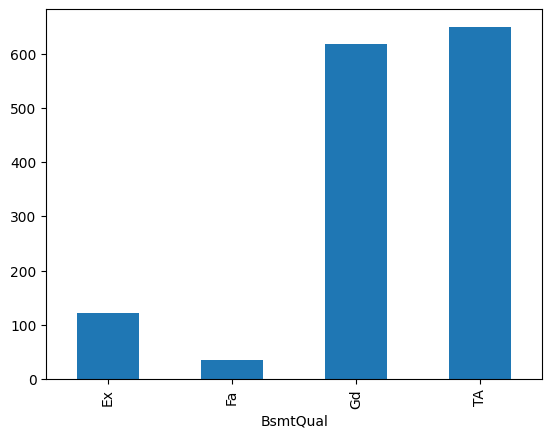

In [15]:
dt.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<Axes: xlabel='BsmtQual'>

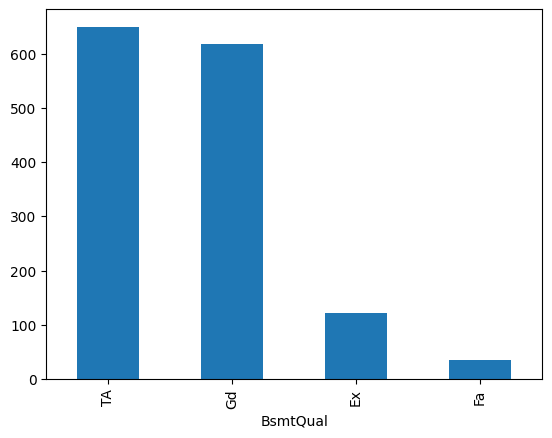

In [14]:
dt.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='GarageType'>

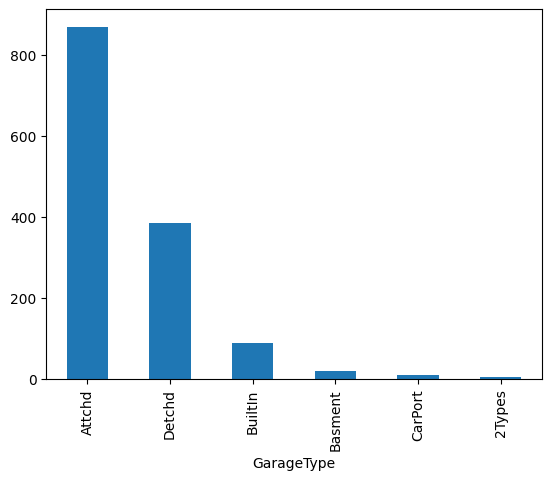

In [17]:
dt['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

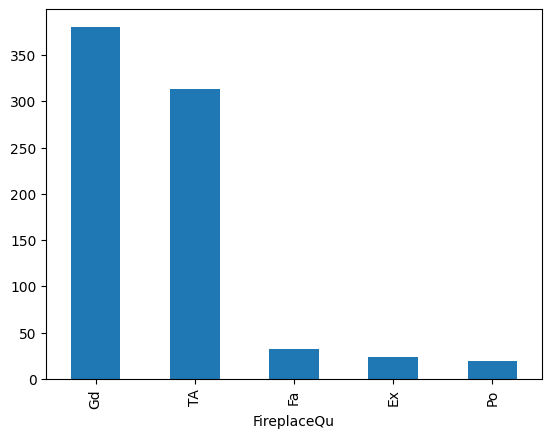

In [19]:
dt['FireplaceQu'].value_counts().plot.bar()

In [23]:
dt['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object', name='GarageType')

In [24]:
## Replacing Function
def impute_nan(dt,variable):
    most_frequent_category=dt[variable].value_counts().index[0]
    dt[variable].fillna(most_frequent_category,inplace=True)

In [27]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(dt,feature)

In [28]:
dt.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Adding a variable to capture NAN

In [148]:
 dt=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
dt.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [149]:
import numpy as np
dt['BsmtQual_new']=np.where(dt['BsmtQual'].isnull(),1,0)

In [150]:
dt.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [151]:
frequent=dt['BsmtQual'].mode()[0]

In [152]:
dt.fillna({'BsmtQual':frequent},inplace=True)

In [153]:
dt.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [154]:
dt['FireplaceQu_new']=np.where(dt['FireplaceQu'].isnull(),1,0)
frequent=dt['FireplaceQu'].mode()[0]

In [155]:
dt.fillna({'FireplaceQu':frequent},inplace=True)

In [156]:
dt.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose you have more frequent categories , we just replace nan with the new category

In [157]:
dt=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [158]:
dt.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [159]:
def impute_nan(dt,variable):
    dt[variable+"newvar"]=np.where(dt[variable].isnull(),"Missing", dt[variable])

In [160]:
for feature in ['BsmtQual','FireplaceQu', 'GarageType']:
    impute_nan(dt,feature)

In [161]:
dt.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [167]:
dt.drop(['BsmtQual','FireplaceQu', 'GarageType'],axis=1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


In [165]:
y_1=dt.drop(['BsmtQual','FireplaceQu', 'GarageType'],axis=1)

In [166]:
y_1.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handling Categorical features

### One hot Encoding

In [180]:
import pandas as pd

In [181]:
dt=pd.read_csv('Titanic-Dataset.csv', usecols=['Sex'])
dt.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [182]:
pd.get_dummies(dt, drop_first=True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [183]:
dt=pd.read_csv('Titanic-Dataset.csv', usecols=['Embarked'])
dt['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [184]:
dt.dropna(inplace=True)

In [186]:
pd.get_dummies(dt,drop_first=True).head()

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


## How to perform One hot encoding in many categories in a feature

In [4]:
import pandas as pd
dt= pd.read_csv('mercedes.csv')
dt.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dt= pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
dt.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [9]:
dt['X0'].value_counts()

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: count, dtype: int64

In [10]:
for i in dt.columns:
    print(len(dt[i].unique()))

47
27
44
7
4
29
12


In [16]:
dt.X1.value_counts().sort_values(ascending=False).head(10)

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [18]:
lst_10=dt.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [19]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [21]:
import numpy as np
for categories in lst_10:
    dt[categories]=np.where(dt['X1']==categories,1,0)

In [23]:
lst_10.append('X1')

In [24]:
dt[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
